# TensolFlow

## base

### constant

In [1]:
import tensorflow as tf
import numpy as np

# それぞれ定数を定義
a = tf.constant(1)
b = tf.constant(2, dtype=tf.float32, shape=[3,2])
c = tf.constant(np.arange(4), dtype=tf.float32, shape=[2,2])

print('a:', a)
print('b:', b)
print('c:', c)

sess = tf.Session()

print('a:', sess.run(a))
print('b:', sess.run(b))
print('c:', sess.run(c))

a: Tensor("Const:0", shape=(), dtype=int32)
b: Tensor("Const_1:0", shape=(3, 2), dtype=float32)
c: Tensor("Const_2:0", shape=(2, 2), dtype=float32)
a: 1
b: [[2. 2.]
 [2. 2.]
 [2. 2.]]
c: [[0. 1.]
 [2. 3.]]


### placeholder

In [2]:
import tensorflow as tf
import numpy as np

# プレースホルダーを定義
x = tf.placeholder(dtype=tf.float32, shape=[None,3])

print('x:', x)

sess = tf.Session()

X = np.random.rand(2,3)
print('X:', X)

# プレースホルダにX[0]を入力
# shapeを(3,)から(1,3)にするためreshape
print('x:', sess.run(x, feed_dict={x:X[0].reshape(1,-1)}))
# プレースホルダにX[1]を入力
print('x:', sess.run(x, feed_dict={x:X[1].reshape(1,-1)}))

x: Tensor("Placeholder:0", shape=(?, 3), dtype=float32)
X: [[0.83132511 0.10326707 0.23748179]
 [0.75793692 0.2885984  0.06673524]]
x: [[0.8313251  0.10326707 0.23748179]]
x: [[0.7579369  0.2885984  0.06673525]]


### variables

In [3]:
# 定数を定義
a = tf.constant(10)
print('a:', a)
# 変数を定義
x = tf.Variable(1)
print('x:', x)

calc_op = x * a

# xの値を更新
update_x = tf.assign(x, calc_op)

sess = tf.Session()

# 変数の初期化
init = tf.global_variables_initializer()
sess.run(init)

print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

sess.run(update_x)
print(sess.run(x))

a: Tensor("Const_3:0", shape=(), dtype=int32)
Instructions for updating:
Colocations handled automatically by placer.
x: <tf.Variable 'Variable:0' shape=() dtype=int32_ref>
1
10
100


## 線形回帰
-----
### [try]
-  noiseの値を変更しよう
-----

Instructions for updating:
Use tf.cast instead.
Generation: 10. 誤差 = 0.17536144
Generation: 20. 誤差 = 0.11303247
Generation: 30. 誤差 = 0.09113143
Generation: 40. 誤差 = 0.073972814
Generation: 50. 誤差 = 0.060473453
Generation: 60. 誤差 = 0.049852766
Generation: 70. 誤差 = 0.041496944
Generation: 80. 誤差 = 0.03492296
Generation: 90. 誤差 = 0.029750876
Generation: 100. 誤差 = 0.025681708
Generation: 110. 誤差 = 0.02248029
Generation: 120. 誤差 = 0.019961566
Generation: 130. 誤差 = 0.017979942
Generation: 140. 誤差 = 0.016420903
Generation: 150. 誤差 = 0.015194334
Generation: 160. 誤差 = 0.014229324
Generation: 170. 誤差 = 0.013470092
Generation: 180. 誤差 = 0.012872773
Generation: 190. 誤差 = 0.012402833
Generation: 200. 誤差 = 0.012033114
Generation: 210. 誤差 = 0.011742225
Generation: 220. 誤差 = 0.0115133645
Generation: 230. 誤差 = 0.0113333175
Generation: 240. 誤差 = 0.011191657
Generation: 250. 誤差 = 0.011080209
Generation: 260. 誤差 = 0.010992532
Generation: 270. 誤差 = 0.010923543
Generation: 280. 誤差 = 0.010869274
Generation: 

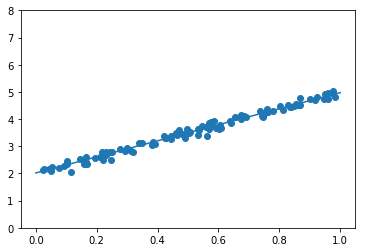

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.1           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 0.28395927
Generation: 20. 誤差 = 0.20945442
Generation: 30. 誤差 = 0.18186903
Generation: 40. 誤差 = 0.16015232
Generation: 50. 誤差 = 0.14297418
Generation: 60. 誤差 = 0.12938583
Generation: 70. 誤差 = 0.11863716
Generation: 80. 誤差 = 0.11013466
Generation: 90. 誤差 = 0.103408925
Generation: 100. 誤差 = 0.09808874
Generation: 110. 誤差 = 0.09388032
Generation: 120. 誤差 = 0.090551354
Generation: 130. 誤差 = 0.087918065
Generation: 140. 誤差 = 0.08583508
Generation: 150. 誤差 = 0.084187366
Generation: 160. 誤差 = 0.082884006
Generation: 170. 誤差 = 0.08185301
Generation: 180. 誤差 = 0.08103742
Generation: 190. 誤差 = 0.0803923
Generation: 200. 誤差 = 0.07988198
Generation: 210. 誤差 = 0.07947831
Generation: 220. 誤差 = 0.079159014
Generation: 230. 誤差 = 0.078906424
Generation: 240. 誤差 = 0.07870662
Generation: 250. 誤差 = 0.07854858
Generation: 260. 誤差 = 0.07842356
Generation: 270. 誤差 = 0.07832465
Generation: 280. 誤差 = 0.078246444
Generation: 290. 誤差 = 0.07818455
Generation: 300. 誤差 = 0.07813562
[3.0497215]


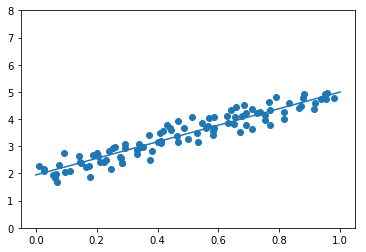

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.3           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 0.49322328
Generation: 20. 誤差 = 0.42430747
Generation: 30. 誤差 = 0.39895996
Generation: 40. 誤差 = 0.3800575
Generation: 50. 誤差 = 0.3659105
Generation: 60. 誤差 = 0.35532224
Generation: 70. 誤差 = 0.34739757
Generation: 80. 誤差 = 0.34146652
Generation: 90. 誤差 = 0.33702752
Generation: 100. 誤差 = 0.33370513
Generation: 110. 誤差 = 0.33121863
Generation: 120. 誤差 = 0.3293576
Generation: 130. 誤差 = 0.32796475
Generation: 140. 誤差 = 0.3269223
Generation: 150. 誤差 = 0.32614204
Generation: 160. 誤差 = 0.32555813
Generation: 170. 誤差 = 0.32512107
Generation: 180. 誤差 = 0.32479393
Generation: 190. 誤差 = 0.32454908
Generation: 200. 誤差 = 0.32436588
Generation: 210. 誤差 = 0.32422873
Generation: 220. 誤差 = 0.32412612
Generation: 230. 誤差 = 0.3240493
Generation: 240. 誤差 = 0.32399178
Generation: 250. 誤差 = 0.32394874
Generation: 260. 誤差 = 0.32391658
Generation: 270. 誤差 = 0.32389244
Generation: 280. 誤差 = 0.32387444
Generation: 290. 誤差 = 0.32386088
Generation: 300. 誤差 = 0.32385087
[2.9338095]
[2.0748553]


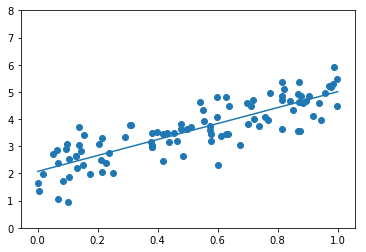

In [6]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.5           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

## 線形回帰
-----
### [try]
-  dの数値を変更しよう
-----

Generation: 10. 誤差 = 0.15390061
Generation: 20. 誤差 = 0.13567422
Generation: 30. 誤差 = 0.13543314
Generation: 40. 誤差 = 0.13528985
Generation: 50. 誤差 = 0.13518155
Generation: 60. 誤差 = 0.13509962
Generation: 70. 誤差 = 0.13503765
Generation: 80. 誤差 = 0.13499075
Generation: 90. 誤差 = 0.13495529
Generation: 100. 誤差 = 0.13492844
Generation: 110. 誤差 = 0.13490814
Generation: 120. 誤差 = 0.13489279
Generation: 130. 誤差 = 0.13488117
Generation: 140. 誤差 = 0.13487238
Generation: 150. 誤差 = 0.13486572
Generation: 160. 誤差 = 0.13486071
Generation: 170. 誤差 = 0.13485688
Generation: 180. 誤差 = 0.13485402
Generation: 190. 誤差 = 0.13485183
Generation: 200. 誤差 = 0.13485017
Generation: 210. 誤差 = 0.13484894
Generation: 220. 誤差 = 0.13484798
Generation: 230. 誤差 = 0.13484728
Generation: 240. 誤差 = 0.13484675
Generation: 250. 誤差 = 0.13484633
Generation: 260. 誤差 = 0.13484602
Generation: 270. 誤差 = 0.1348458
Generation: 280. 誤差 = 0.1348456
Generation: 290. 誤差 = 0.13484548
Generation: 300. 誤差 = 0.13484535
[0.9276169]
[2.021579

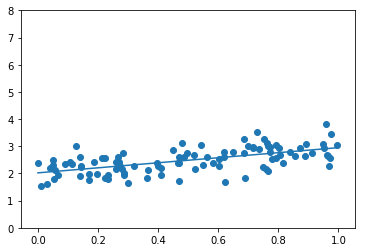

In [7]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 1 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.3           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 0.29410538
Generation: 20. 誤差 = 0.21900749
Generation: 30. 誤差 = 0.19049698
Generation: 40. 誤差 = 0.16912685
Generation: 50. 誤差 = 0.15304674
Generation: 60. 誤差 = 0.14094688
Generation: 70. 誤差 = 0.1318421
Generation: 80. 誤差 = 0.12499096
Generation: 90. 誤差 = 0.11983571
Generation: 100. 誤差 = 0.11595648
Generation: 110. 誤差 = 0.11303745
Generation: 120. 誤差 = 0.11084097
Generation: 130. 誤差 = 0.10918818
Generation: 140. 誤差 = 0.107944496
Generation: 150. 誤差 = 0.107008666
Generation: 160. 誤差 = 0.106304504
Generation: 170. 誤差 = 0.1057746
Generation: 180. 誤差 = 0.10537589
Generation: 190. 誤差 = 0.10507584
Generation: 200. 誤差 = 0.10485008
Generation: 210. 誤差 = 0.10468023
Generation: 220. 誤差 = 0.10455238
Generation: 230. 誤差 = 0.10445618
Generation: 240. 誤差 = 0.10438381
Generation: 250. 誤差 = 0.10432935
Generation: 260. 誤差 = 0.10428837
Generation: 270. 誤差 = 0.10425754
Generation: 280. 誤差 = 0.10423433
Generation: 290. 誤差 = 0.10421685
Generation: 300. 誤差 = 0.10420373
[2.9562237]
[2.006

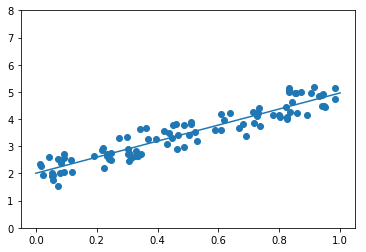

In [8]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 3 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.3           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()

Generation: 10. 誤差 = 0.6979292
Generation: 20. 誤差 = 0.51600534
Generation: 30. 誤差 = 0.42251056
Generation: 40. 誤差 = 0.34993386
Generation: 50. 誤差 = 0.29348546
Generation: 60. 誤差 = 0.24958095
Generation: 70. 誤差 = 0.2154329
Generation: 80. 誤差 = 0.1888731
Generation: 90. 誤差 = 0.16821548
Generation: 100. 誤差 = 0.1521483
Generation: 110. 誤差 = 0.1396516
Generation: 120. 誤差 = 0.1299318
Generation: 130. 誤差 = 0.12237202
Generation: 140. 誤差 = 0.11649212
Generation: 150. 誤差 = 0.11191885
Generation: 160. 誤差 = 0.108361796
Generation: 170. 誤差 = 0.105595216
Generation: 180. 誤差 = 0.10344342
Generation: 190. 誤差 = 0.1017698
Generation: 200. 誤差 = 0.10046806
Generation: 210. 誤差 = 0.09945559
Generation: 220. 誤差 = 0.098668136
Generation: 230. 誤差 = 0.09805566
Generation: 240. 誤差 = 0.09757928
Generation: 250. 誤差 = 0.09720877
Generation: 260. 誤差 = 0.096920624
Generation: 270. 誤差 = 0.09669647
Generation: 280. 誤差 = 0.09652214
Generation: 290. 誤差 = 0.09638654
Generation: 300. 誤差 = 0.0962811
[4.788657]
[2.0801055]


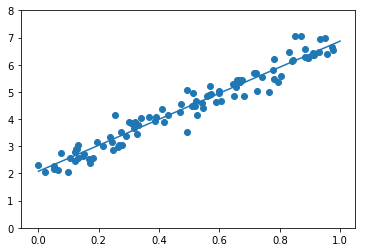

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 【レポート提出者変更】
%matplotlib inline

iters_num = 300
plot_interval = 10

# データを生成
n = 100
x = np.random.rand(n)
d = 5 * x + 2         # 3 * x + 2

# ノイズを加える
noise = 0.3           # original 0.3
d = d + noise * np.random.randn(n) 

# 入力値
xt = tf.placeholder(tf.float32)
dt = tf.placeholder(tf.float32)

# 最適化の対象の変数を初期化
W = tf.Variable(tf.zeros([1]))
b = tf.Variable(tf.zeros([1]))

y = W * xt + b

# 誤差関数 平均2乗誤差
loss = tf.reduce_mean(tf.square(y - dt))
optimizer = tf.train.GradientDescentOptimizer(0.1)
train = optimizer.minimize(loss)

# 初期化
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

# 作成したデータをトレーニングデータとして準備
x_train = x.reshape(-1,1)
d_train = d.reshape(-1,1)

# トレーニング
for i in range(iters_num):
    sess.run(train, feed_dict={xt:x_train,dt:d_train})
    if (i+1) % plot_interval == 0:
        loss_val = sess.run(loss, feed_dict={xt:x_train,dt:d_train}) 
        W_val = sess.run(W)
        b_val = sess.run(b)
        print('Generation: ' + str(i+1) + '. 誤差 = ' + str(loss_val))

print(W_val)
print(b_val)

#  予測関数
def predict(x):
    return W_val * x + b_val

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)

plt.ylim(0, 8)  ## 【レポート提出者変更】

plt.scatter(x, d)
linex = np.linspace(0, 1, 2)
liney = predict(linex)
subplot.plot(linex,liney)
plt.show()